# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
weather_api_key = "2c62be53631dabbc8516df4e87aaeee7"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahina
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | grand-bassam
Processing Record 4 of Set 1 | selkirk
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | dauphin
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | komsomolets
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | barclayville
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | mityana
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | bamboo flat
Processing Record 17 of Set 1 | urangan
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 21 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahina,-17.5065,-149.4890,26.87,74,75,1.03,PF,1702882223
1,wailua homesteads,22.0669,-159.3780,20.44,87,75,7.20,US,1702882224
2,grand-bassam,5.2118,-3.7388,25.98,85,9,0.93,CI,1702882224
3,selkirk,50.1436,-96.8845,-12.96,77,61,1.34,CA,1702882225
4,edinburgh of the seven seas,-37.0676,-12.3116,12.44,68,10,1.07,SH,1702882225


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahina,-17.5065,-149.4890,26.87,74,75,1.03,PF,1702882223
1,wailua homesteads,22.0669,-159.3780,20.44,87,75,7.20,US,1702882224
2,grand-bassam,5.2118,-3.7388,25.98,85,9,0.93,CI,1702882224
3,selkirk,50.1436,-96.8845,-12.96,77,61,1.34,CA,1702882225
4,edinburgh of the seven seas,-37.0676,-12.3116,12.44,68,10,1.07,SH,1702882225


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

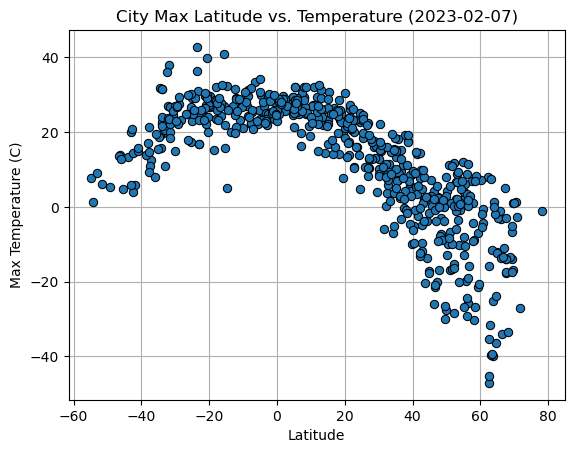

In [8]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

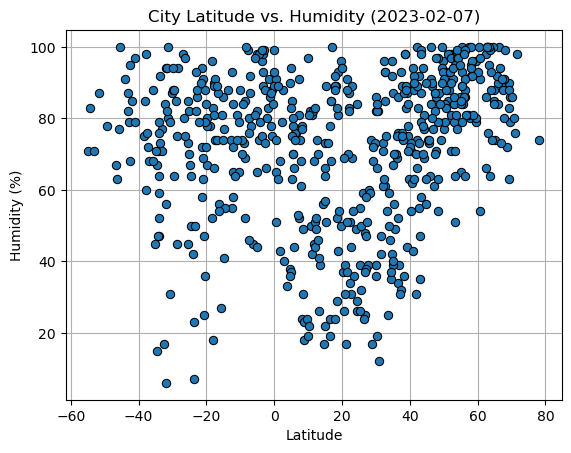

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

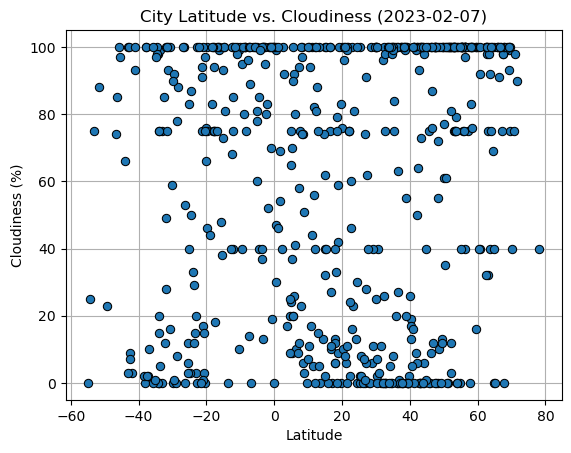

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

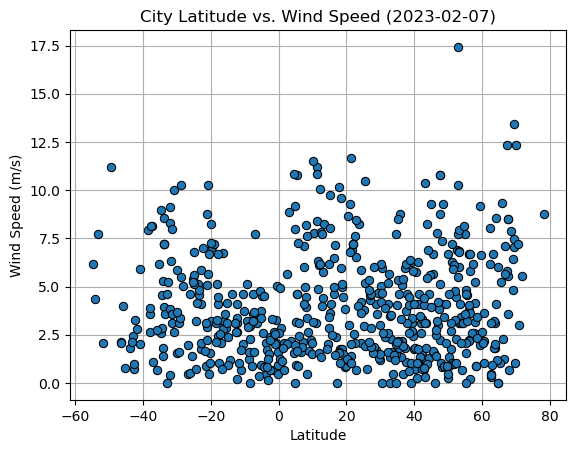

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, ylabel, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label plot
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    
    # Print r square value
    print(f"The r-value is: {r_value**2}")
    
    # Show plot
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,20.44,87,75,7.20,US,1702882224
2,grand-bassam,5.2118,-3.7388,25.98,85,9,0.93,CI,1702882224
3,selkirk,50.1436,-96.8845,-12.96,77,61,1.34,CA,1702882225
5,dauphin,51.1494,-100.0502,-16.92,85,0,1.03,CA,1702882226
6,iqaluit,63.7506,-68.5145,-25.15,64,40,3.09,CA,1702882226


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahina,-17.5065,-149.4890,26.87,74,75,1.03,PF,1702882223
4,edinburgh of the seven seas,-37.0676,-12.3116,12.44,68,10,1.07,SH,1702882225
7,hermanus,-34.4187,19.2345,19.10,71,98,4.55,ZA,1702882227
12,margaret river,-33.9500,115.0667,22.15,47,15,8.58,AU,1702882229
14,port-aux-francais,-49.3500,70.2167,5.36,78,23,11.18,TF,1702882230


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6796474760640221


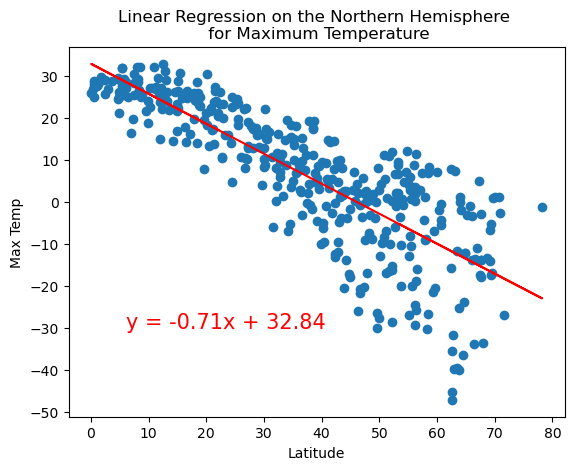

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',
                                              (6,-30))

The r-value is: 0.013746492823460663


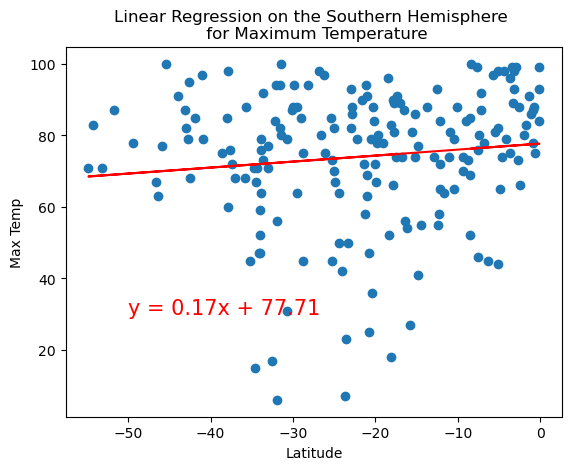

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,30))

**Discussion about the linear relationship:** 

- In the Nothern Hemisphere, the regression line has a negative slope (y = -0.71x + 32.84), which indicates that as you move away from the equator towards the North Pole (increasing latitude), the maximum temperature tends to decrease. This is a strong relationship, as one would expect, since temperatures are generally higher near the equator and decrease towards the poles.

- For the Southern Hemisphere, the regression line in the Southern Hemisphere has a positive slope (y = 0.17x + 77.71), suggesting that as you move closer to the equator from the South Pole (increasing latitude), the maximum temperature tends to increase. This aligns with the general understanding of global temperature distribution, where equatorial regions are warmer.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22044180003006497


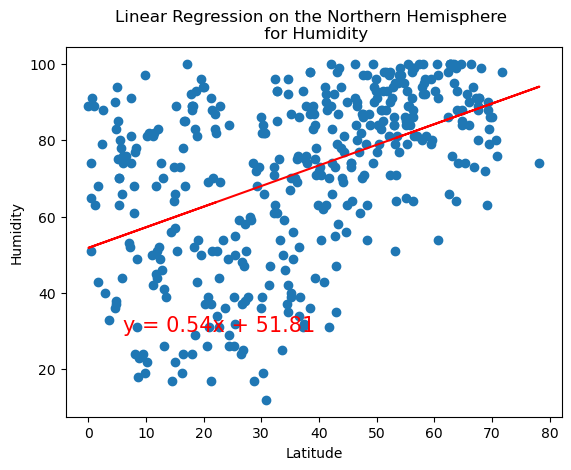

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Humidity',
                       'Humidity',(6,30))

The r-value is: 0.013746492823460663


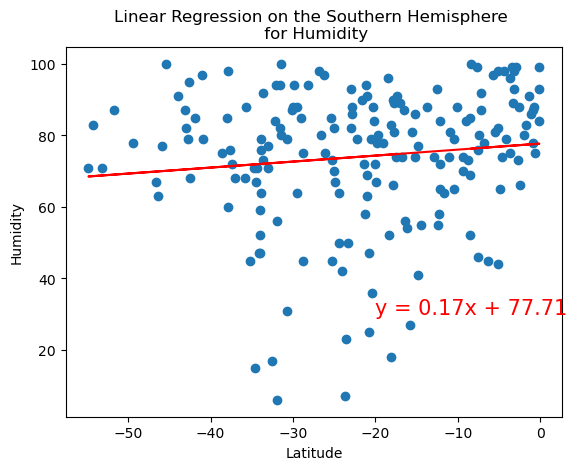

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Humidity',
                       'Humidity',(-20,30))

**Discussion about the linear relationship:**

- For the NoRthern Hemisphere, the regression line has a positive slope (y = 0.54x + 51.81), indicating that humidity tends to increase as the latitude increases in the Northern Hemisphere. The r-value is approximately 0.2204, which suggests that about 22% of the variability in humidity can be explained by latitude. This indicates a weak to moderate positive relationship.

- The regression line for the Southern Hemisphere also has a positive slope (y = 0.17x + 77.71), suggesting that there is a slight increase in humidity as one moves closer to the equator. However, the r-value here is approximately 0.0137, which is very low and indicates that latitude explains very little of the variability in humidity — less than 2%. This suggests that other factors are likely more influential in determining humidity levels in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07191937364014828


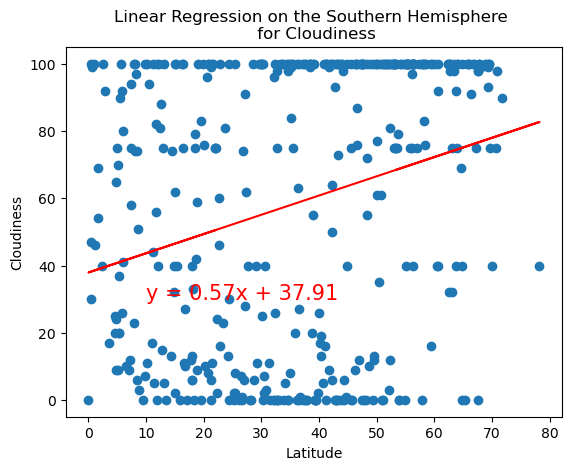

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness',
                       'Cloudiness', (10, 30))

The r-value is: 0.09138489693099439


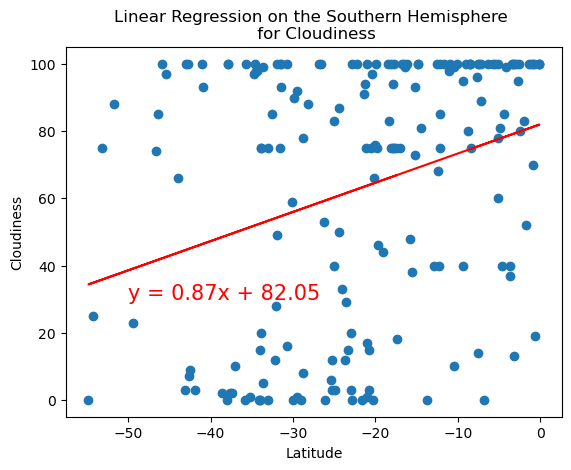

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness',
                       'Cloudiness', (-50, 30))

**Discussion about the linear relationship:** 

- The regression line for the Northern Hemisphere has a positive slope (y = 0.57x + 37.91), indicating a slight increase in cloudiness as latitude increases in the Northern Hemisphere. However, the r-value of about 0.0719 suggests a very weak correlation. This low r-value implies that latitude alone does not strongly predict cloudiness levels in the Northern Hemisphere.

- Similarly, the regression line for the Southern Hemisphere shows a positive slope (y = 0.87x + 82.05), which suggests that cloudiness increases as one moves towards the equator. The r-value of approximately 0.0914 also indicates a weak correlation. Like the Northern Hemisphere, this implies that other factors in addition to latitude are influencing cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0006095997217934419


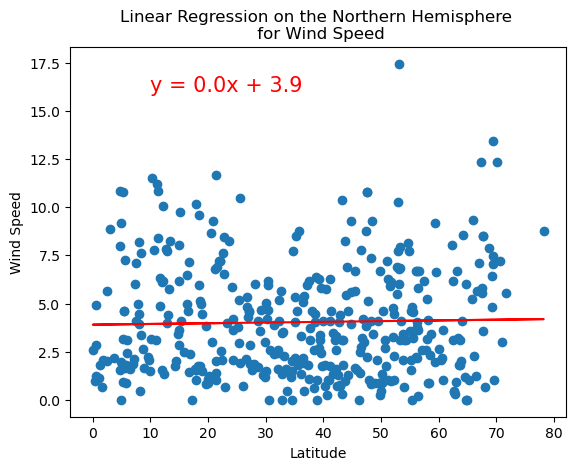

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed', (10, 16))

The r-value is: 0.08900242651889774


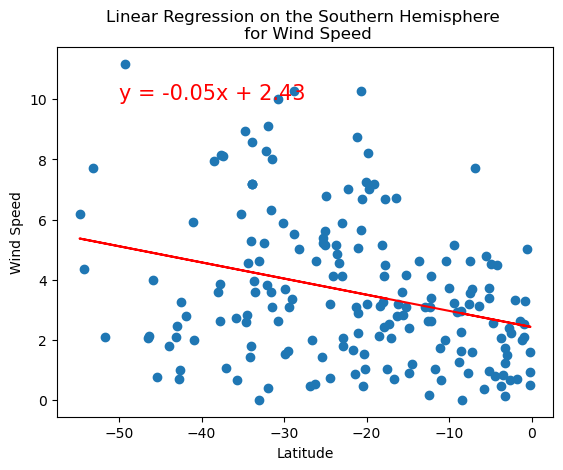

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed', (-50, 10))

**Discussion about the linear relationship:** 

- The regression line for the Northern Hemisphere (y = 0.0x + 3.9) is nearly horizontal, which indicates almost no relationship between latitude and wind speed in the Northern Hemisphere. This is confirmed by an extremely low r-value of approximately 0.00061, suggesting that latitude does not predict wind speed in the Northern Hemisphere.

- The regression line for the Southern Hemisphere (y = -0.05x + 2.43) has a slight negative slope, suggesting that wind speed may decrease as one moves closer to the equator in the Southern Hemisphere. However, the r-value of about 0.0890 is still quite low, indicating that this is a weak correlation and that latitude is not a strong predictor of wind speed in the Southern Hemisphere either.